In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import matplotlib.colors as mcol
import matplotlib.cm as cm
import math
import time
import cv2
from itertools import cycle
cycol = cycle('bgrcmk') #here I'm generating a list of colors I can plot

In [2]:
matrix=np.array([1,2,3,4,5,6,7,8,9,10])

In [3]:
logmatrix=np.log(matrix)

In [4]:
print(logmatrix)

[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509]


In [5]:
(logmatrix==0)

array([ True, False, False, False, False, False, False, False, False,
       False])

In [6]:
logmatrix[logmatrix==0]=1

In [7]:
print(logmatrix)

[1.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509]


In [8]:
grainyimage_height=100
grainyimage_width=100
grainyimage=np.zeros([grainyimage_height*grainyimage_width])

In [9]:
for i in range(grainyimage_height*grainyimage_width):
    grainyimage[i]=random.randint(0,100)

In [10]:
print('Shape before reshaping: {0}'.format(grainyimage.shape))
grainyimage=grainyimage.reshape(-1,grainyimage_height,grainyimage_width)
print('Shape after reshaping: {0}'.format(grainyimage.shape))
#np.expand_dims(grainyimage, axis=0) #an image has to be 2D or 3D so If the image was only 100 by 100, I'd need to expand the dimsension of the numpy array


Shape before reshaping: (10000,)
Shape after reshaping: (1, 100, 100)


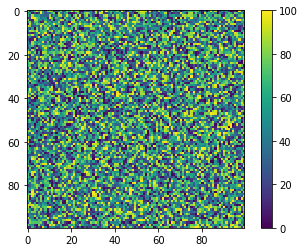

In [14]:
gimage=plt.colorbar(plt.imshow(grainyimage[0]))


In [16]:
import json
values=[23,45]

In [28]:
#creating a function for writing a JSON file that the D415 camera can use
def writeD415Json(path,filename,values):
    filepathname= './' + path + filename + '.json'
    parameters={}
    parameters['string1']=str(values[0]) 
    parameters['string2']=str(values[1])
    with open(filepathname, 'w') as fp:
        json.dump(parameters, fp)

filename='practice_writing_file'
path='./'
writeD415Json(path,filename,values)

In [29]:
!ls #the file practice_writing_file.json should now be present

20180413_3.bin                 realsense-optimization.ipynb
d415paramset_1.json            realsense-optimization_2.ipynb
general_sandbox.ipynb          sdsb_sandbox_2.ipynb
practice_writing_file.json     sdsb_sandbox_3.ipynb
realsense-optimization         sdsb_sandbox_4.ipynb


In [30]:
with open("practice_writing_file.json") as json_data: #Json file to be loaded
    J = json.load(json_data)
    print(J)
    J=str(J).replace("'", '\"') #IF YOU DON't DO THIS IT WILL NOT WORK
    print(J)
    

{'string1': '23', 'string2': '45'}
{"string1": "23", "string2": "45"}


In [50]:
values= [400, 0.461914, -0.553711, -0.553711, 0.0458984, 0.540039, 0.540039, 0.208008, -0.332031, -0.212891, -0.212891, 0.68457, 0.930664, 65536, 624, 53, "True", 33000, "True", 166, 0, 0 , 50, 64, 300, 0, 3, 64, 50, "True", 4600, 16, "False", 150, "on", 0, 400, 9, 9, 9, 9, 65536, 624, 901, 0, 0, 0, 0, 0, 0, 53, 800, 26, 24, 2047, 500, 1, 7, 1, 1, 3, 1, 1, 3, 0.0499022, 0.0499022, 0.0499022, 3, 1, 10, 10, 4, 1, 0.375, 72, 72, 72, 60, 105, 70, 342, 190, 130, 325, 0, 0, 1, 901] 


In [51]:
def writeD415Json(path,filename,values):
    filepathname= './' + path + filename + '.json'
    parameters={}
    parameters["aux-param-autoexposure-setpoint"]=str(values[0])
    parameters["aux-param-colorcorrection1"]=str(values[1])
    parameters["aux-param-colorcorrection10"]=str(values[2])
    parameters["aux-param-colorcorrection11"]=str(values[3])
    parameters["aux-param-colorcorrection12"]=str(values[4]) 
    parameters["aux-param-colorcorrection2"]=str(values[5])
    parameters["aux-param-colorcorrection3"]=str(values[6])
    parameters["aux-param-colorcorrection4"]=str(values[7]) 
    parameters["aux-param-colorcorrection5"]=str(values[8])
    parameters["aux-param-colorcorrection6"]=str(values[9])
    parameters["aux-param-colorcorrection7"]=str(values[10])
    parameters["aux-param-colorcorrection8"]=str(values[11])
    parameters["aux-param-colorcorrection9"]=str(values[12])
    parameters["aux-param-depthclampmax"]=str(values[13])
    parameters["aux-param-depthclampmin"]=str(values[14])
    parameters["aux-param-disparityshift"]=str(values[15])
    parameters["controls-autoexposure-auto"]=str(values[16])
    parameters["controls-autoexposure-manual"]=str(values[17])
    parameters["controls-color-autoexposure-auto"]=str(values[18])
    parameters["controls-color-autoexposure-manual"]=str(values[19])
    parameters["controls-color-backlight-compensation"]=str(values[20])
    parameters[ "controls-color-brightness"]=str(values[21])
    parameters["controls-color-contrast"]=str(values[22])
    parameters["controls-color-gain"]=str(values[23])
    parameters["controls-color-gamma"]=str(values[24])
    parameters["controls-color-hue"]=str(values[25])
    parameters["controls-color-power-line-frequency"]=str(values[26])
    parameters["controls-color-saturation"]=str(values[27])
    parameters["controls-color-sharpness"]=str(values[28])
    parameters["controls-color-white-balance-auto"]=str(values[29])
    parameters["controls-color-white-balance-manual"]=str(values[30])
    parameters["controls-depth-gain"]=str(values[31])
    parameters["controls-depth-white-balance-auto"]=str(values[32])
    parameters["controls-laserpower"]=str(values[33])
    parameters["controls-laserstate"]=str(values[34])
    parameters["ignoreSAD"]=str(values[35])
    parameters["param-autoexposure-setpoint"]=str(values[36])
    parameters["param-censusenablereg-udiameter"]=str(values[37])
    parameters["param-censusenablereg-vdiameter"]=str(values[38])
    parameters["param-censususize"]=str(values[39])
    parameters["param-censusvsize"]=str(values[40])
    parameters["param-depthclampmax"]=str(values[41]), 
    parameters["param-depthclampmin"]=str(values[42]) 
    parameters["param-depthunits"]=str(values[43])
    parameters["param-disableraucolor"]=str(values[44])
    parameters["param-disablesadcolor"]=str(values[45])
    parameters["param-disablesadnormalize"]=str(values[46])
    parameters["param-disablesloleftcolor"]=str(values[47])
    parameters["param-disableslorightcolor"]=str(values[48]) 
    parameters["param-disparitymode"]=str(values[49])
    parameters["param-disparityshift"]=str(values[50])
    parameters["param-lambdaad"]=str(values[51])
    parameters["param-lambdacensus"]=str(values[52])
    parameters["param-leftrightthreshold"]=str(values[53])
    parameters["param-maxscorethreshb"]=str(values[54])
    parameters["param-medianthreshold"]=str(values[55])
    parameters["param-minscorethresha"]=str(values[56])
    parameters["param-neighborthresh"]=str(values[57])
    parameters["param-raumine"]=str(values[58])
    parameters["param-rauminn"]=str(values[59])
    parameters["param-rauminnssum"]=str(values[60])
    parameters["param-raumins"]=str(values[61])
    parameters["param-rauminw"]=str(values[62])
    parameters["param-rauminwesum"]=str(values[63])
    parameters["param-regioncolorthresholdb"]=str(values[64])
    parameters["param-regioncolorthresholdg"]=str(values[65])
    parameters["param-regioncolorthresholdr"]=str(values[66]) 
    parameters["param-regionshrinku"]=str(values[67])
    parameters["param-regionshrinkv"]=str(values[68])
    parameters["param-robbinsmonrodecrement"]=str(values[69])
    parameters["param-robbinsmonroincrement"]=str(values[70])
    parameters["param-rsmdiffthreshold"]=str(values[71])
    parameters["param-rsmrauslodiffthreshold"]=str(values[72]) 
    parameters["param-rsmremovethreshold"]=str(values[73]) 
    parameters["param-scanlineedgetaub"]=str(values[74])
    parameters["param-scanlineedgetaug"]=str(values[75]) 
    parameters["param-scanlineedgetaur"]=str(values[76]) 
    parameters["param-scanlinep1"]=str(values[77]) 
    parameters["param-scanlinep1onediscon"]=str(values[78]) 
    parameters["param-scanlinep1twodiscon"]=str(values[79])
    parameters["param-scanlinep2"]=str(values[80])
    parameters["param-scanlinep2onediscon"]=str(values[81])
    parameters["param-scanlinep2twodiscon"]=str(values[82])
    parameters["param-secondpeakdelta"]=str(values[83])
    parameters["param-texturecountthresh"]=str(values[84])
    parameters["param-texturedifferencethresh"]=str(values[85])
    parameters["param-usersm"]=str(values[86]) 
    parameters["param-zunits"]=str(values[87])

    with open(filepathname, 'w') as fp:
        json.dump(parameters, fp)

filename='practice_writing_file'
path='./'
writeD415Json(path,filename,values)

In [53]:
with open("practice_writing_file.json") as json_data: #Json file to be loaded
    J = json.load(json_data)
    #print(J)
    J=str(J).replace("'", '\"') #IF YOU DON't DO THIS IT WILL NOT WORK with the librealsense sdk
    print(J)

{"aux-param-autoexposure-setpoint": "400", "aux-param-colorcorrection1": "0.461914", "aux-param-colorcorrection10": "-0.553711", "aux-param-colorcorrection11": "-0.553711", "aux-param-colorcorrection12": "0.0458984", "aux-param-colorcorrection2": "0.540039", "aux-param-colorcorrection3": "0.540039", "aux-param-colorcorrection4": "0.208008", "aux-param-colorcorrection5": "-0.332031", "aux-param-colorcorrection6": "-0.212891", "aux-param-colorcorrection7": "-0.212891", "aux-param-colorcorrection8": "0.68457", "aux-param-colorcorrection9": "0.930664", "aux-param-depthclampmax": "65536", "aux-param-depthclampmin": "624", "aux-param-disparityshift": "53", "controls-autoexposure-auto": "True", "controls-autoexposure-manual": "33000", "controls-color-autoexposure-auto": "True", "controls-color-autoexposure-manual": "166", "controls-color-backlight-compensation": "0", "controls-color-brightness": "0", "controls-color-contrast": "50", "controls-color-gain": "64", "controls-color-gamma": "300", 